<a href="https://colab.research.google.com/github/Rayssa-Nunes/analise-reclamacao-de-entrega/blob/main/Avalia%C3%A7%C3%A3o_de_Reclama%C3%A7%C3%A3o_de_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Casos de Reclamação em Entregas

Você faz parte do time de logística em uma empresa de caminhões tanque. Esses caminhões podem transportar grandes quantidades de líquidos e gases liquefeitos para realizar entregas em clientes.

Em um projeto novo, seu time uniu-se ao time de experiência do cliente para avaliar situações de reclamações de entrega e KPIs logísticos no geral. O objetivo principal é tentar entender quais parâmetros estão causando as possíveis insatisfações nos clientes e trabalhar preventivamente para evitar isso.

Uma base contendo viagens dos últimos três meses foi disponibilizada, de maneira que você consiga fazer as primeiras análises descritivas. Algumas perguntas já foram levantadas e precisam ser respondidas, a intenção é que elas sejam apresentadas na próxima reunião de alinhamento do projeto!


**Base de Dados**
A base contém informações como:

- ID da viagem: Código identificador único de cada viagem feita
- Número de entregas: Quantas entregas foram realizadas durante a viagem executada
- Tipo de caminhão: Qual o tipo de caminhão utilizado no transporte da carga
- Produto: Produto entregue na viagem. Por se tratar de um caminhão tanque, - apenas 1 tipo de produto é entregue por viagem
- Distância: Total da distância percorrida durante todo o trajeto
- Número de dias: Total de dias que a viagem durou
- Número de paradas do motorista: Número de vezes que o motorista parou, seja para alimentação, descanso, ir ao banheiro ou qualquer outro motivo
- Reclamação: Se houve reclamação associada a viagem.

**Perguntas a Serem Respondidas**

1. Em uma reunião o chefe de logística disse que a mais da metade das viagens fazem mais que 6 entregas. Essa informação está correta?
2. Existe alguma correlação aparente entre o número de entregas e a distância percorrida?
3. Considerando uma análise IV, existe alguma relação entre o tipo de produto entregue e a existência de reclamações?
4. Novamente considerando a análise IV, existe alguma relação entre a distância e a existência de reclamações?
5. Como os dados de Distância estão distribuídos por tipo de produto?
6. Utilizando o R², você diria que há associação aparente entre as variáveis de Reclamações e Número de paradas do motorista?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_excel('Relatorio_Entregas.xlsx')
dados.head()

,ID_viagem,numero_entregas,tipo_caminhao,produto,Distância,numero_dias,numero_paradas_motorista,Reclamação
0,TRIP-000001,2,Tanque grande,Produto B,268,1,6,Não
1,TRIP-000002,1,Tanque médio,Produto D,154,1,4,Sim
2,TRIP-000003,6,Tanque médio,Produto D,140,1,3,Sim
3,TRIP-000004,2,Tanque médio,Produto A,140,1,5,Não
4,TRIP-000005,28,Tanque grande,Produto A,576,2,10,Não


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID_viagem                 1000 non-null   object
 1   numero_entregas           1000 non-null   int64 
 2   tipo_caminhao             1000 non-null   object
 3   produto                   1000 non-null   object
 4   Distância                 1000 non-null   int64 
 5   numero_dias               1000 non-null   int64 
 6   numero_paradas_motorista  1000 non-null   int64 
 7   Reclamação                1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
dados.shape

(1000, 8)

## Resposta 1

A afirmação do chefe de logística **não está correta**.

Para verificar, foi utilizado a **mediana** do número de entregas por viagem, que é uma medida de tendência central que **divide o conjunto de dados ao meio**: metade das viagens fez **até 3 entregas**, e a outra metade fez **mais de 3**.

Portanto, a afirmação de que "mais da metade das viagens fazem mais de  entregas" **não é compatível com os dados** analisados.

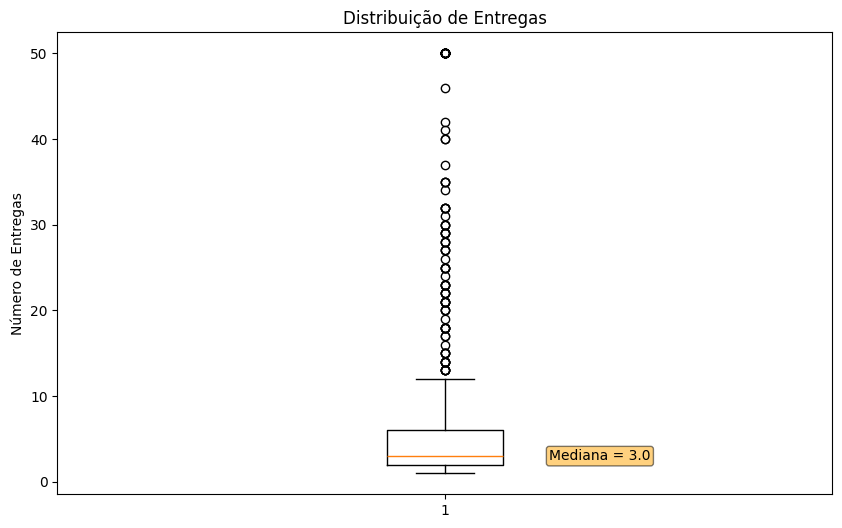

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Distribuição de Entregas')
plt.ylabel('Número de Entregas')

plt.boxplot(dados['numero_entregas'])
mediana = dados['numero_entregas'].quantile(0.5)
plt.text(1.2, mediana, f'Mediana = {mediana:.1f}', va='center', ha='center',
         bbox=dict(boxstyle='round, pad=0.2', facecolor='orange', alpha=0.5))
plt.show()

## Resposta 2

Utilizamos o coeficiente de **correlação de Pearson** para medir a relação linear entre as variáveis **numero_entregas** e **Distância**.

O resultado obtido foi de **0.734**, indicando uma **forte correlação positiva** entre elas.


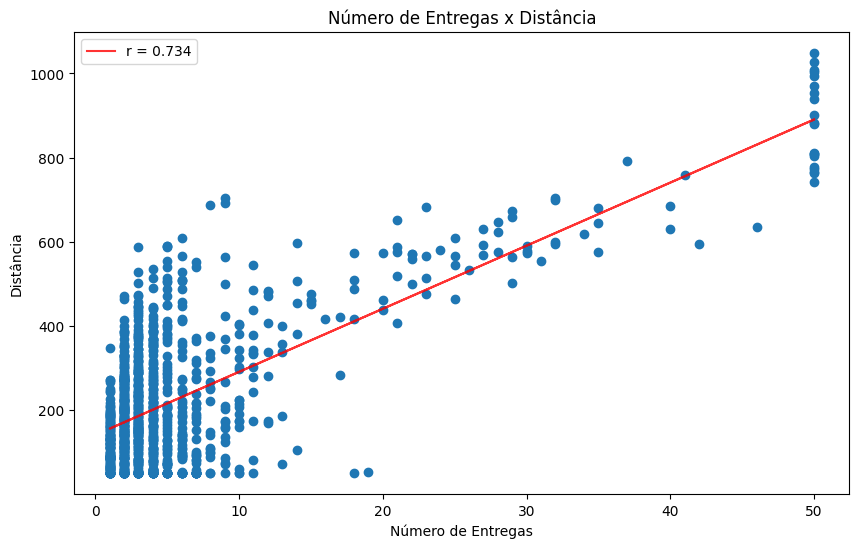

In [ ]:
correlacao = dados[['numero_entregas', 'Distância']].corr(method='pearson').iloc[0, 1]

x = dados['numero_entregas']
y = dados['Distância']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title('Número de Entregas x Distância')
plt.xlabel('Número de Entregas')
plt.ylabel('Distância')
plt.plot(x, p(x), "r-", alpha=0.8, label=f'r = {correlacao:.3f}')
plt.legend()

plt.show()

## Resposta 3 e 4

Para responder a questões 3 e 4 utilizamos o **Information Value (IV)**, como solicitado.

- Na **questão 3**, analisamos as variáveis **produtos** e **Reclamação**, e obtivemos um **IV = 0.4204**, indicando uma **forte relação** entre elas.

- Na **questão 4**, analisamos as variáveis **Distância** e **Reclamação** com um **IV = 0.0425**, o que indica uma **fraca relação** entre essas variáveis.

In [ ]:
def obter_iv(coluna1):
  # Contagem de Sim e Não por produto
  contagem = dados.groupby([coluna1, 'Reclamação'], observed=False).size().unstack(fill_value=0)

  # Totais
  total_sim = contagem['Sim'].sum()
  total_nao = contagem['Não'].sum()

  # Proporções
  p_sim = contagem['Sim'] / total_sim
  p_nao = contagem['Não'] / total_nao

  # Substituir zeros por um valor pequeno
  p_sim = p_sim.replace(0, 1e-10)
  p_nao = p_nao.replace(0, 1e-10)

  # Odds e log(odds)
  iv_por_grupo = (p_sim - p_nao) * np.log(p_sim / p_nao)

  # Soma total do IV
  iv_total = iv_por_grupo.sum()
  return f'IV: {iv_total:.4f}'

In [ ]:
obter_iv('produto')

'IV: 0.4204'

In [ ]:
inicio = dados['Distância'].min()
fim = dados['Distância'].max()
bins = np.arange(inicio, fim + 100, 100)
intervalos = pd.cut(dados['Distância'], bins=bins)
contagem = intervalos.value_counts().sort_index()
print(contagem)

Distância
(50, 150]      294
(150, 250]     242
(250, 350]     142
(350, 450]      89
(450, 550]      46
(550, 650]      40
(650, 750]      12
(750, 850]      10
(850, 950]       4
(950, 1050]      7
Name: count, dtype: int64


In [ ]:
obter_iv(intervalos)

'IV: 0.0425'

## Resposta 5

Para analisar se a **distribuição de produtos** têm relação com a **distância** utilizamos o **gráfico de boxplot**.

O gráfico mostrou que as **medianas** e a **distribuição dos valores** são bastante semelhantes entre diferentes produtos. Isso indica que **não há uma diferença significativa** na distância em função do produto.

Portanto, podemos inferir que **produto e distância não estão diretamente relacionados**.

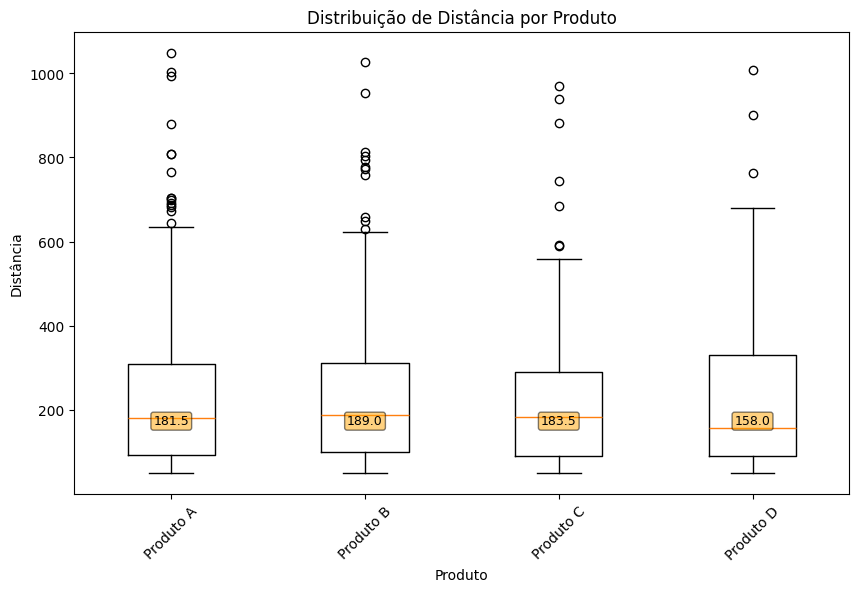

In [ ]:
# Agrupar dados por produto
grupos = dados.groupby('produto')['Distância']

# Preparar os dados para o boxplot
valores = [grupo.tolist() for _, grupo in grupos]
labels = [str(produto) for produto in grupos.groups.keys()]

# Criar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(valores, tick_labels=labels)
plt.title('Distribuição de Distância por Produto')
plt.xlabel('Produto')
plt.ylabel('Distância')
plt.xticks(rotation=45)

# Calcular e anotar a mediana de cada grupo
medianas = grupos.median().tolist()
for i, med in enumerate(medianas, start=1):
  plt.text(i, mediana, f'{med:.1f}', va='bottom', ha='center', fontsize=9,
          bbox=dict(boxstyle='round, pad=0.2', facecolor='orange', alpha=0.5))

plt.show()

## Resposta 6

Para esta análise utilizamos o **coeficiente de determinação R² para quantificar a associação linear entre as variáveis de Reclamação e numero_paradas_motorista**.

O valor obtido foi **muito próximo de zero (R² = 0.000990995)**, o que indica que **quase nenhuma variação em uma variável é explicada pela outra**. Ou seja, **não há uma associação linear aparente entre elas**.

In [ ]:
coef_det = dados.groupby('Reclamação')['numero_paradas_motorista'].count()
coef_det['media'] = coef_det.mean()

,numero_paradas_motorista
Reclamação,
Não,729.0
Sim,271.0
media,500.0


In [ ]:
coef_det = dados.groupby('Reclamação')['numero_paradas_motorista'].agg(
    contagem='count',
    variancia='var'
).reset_index()

# Calcular os totais gerais
soma_contagem = coef_det['contagem'].sum()
variancia_total = dados['numero_paradas_motorista'].var()

# Criar uma linha total
linha_total = pd.DataFrame([{
    'Reclamação': 'TOTAL',
    'contagem': soma_contagem,
    'variancia': variancia_total
}])

# Adiciona ao DataFrame
coef_det = pd.concat([coef_det, linha_total], ignore_index=True)
coef_det

,Reclamação,contagem,variancia
0,Não,729,5.499423
1,Sim,271,5.131365
2,TOTAL,1000,5.405036


In [ ]:
variancia_ponderada = (coef_det.loc[0, 'contagem'] * coef_det.loc[0, 'variancia'] + coef_det.loc[1, 'contagem'] * coef_det.loc[1, 'variancia']) / (coef_det.loc[0, 'contagem'] + coef_det.loc[1, 'contagem'])
variancia_ponderada

np.float64(5.39967967032967)

In [ ]:
r2 = 1 - (variancia_ponderada / np.mean(coef_det.loc[2, 'variancia']))
r2

np.float64(0.0009909953736956245)